# Regression
In the previous chapter, you made use of image and political datasets to predict binary as well as multiclass outcomes. But what if your problem requires a continuous outcome? Regression, which is the focus of this chapter, is best suited to solving such problems. You will learn about fundamental concepts in regression and apply them to predict the life expectancy in a given country using Gapminder data.

## Introduction to regression

In [1]:
from IPython.display import HTML, Image
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/01-Introduction_to_regression.mp4" type="video/mp4">
</video>

In [3]:
# Boston housing data
boston = pd.read_csv('../_datasets/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Creating feature and target arrays
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

# Predicting house value from a single feature
X_rooms = X[:,5]
print(type(X_rooms), type(y))

y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


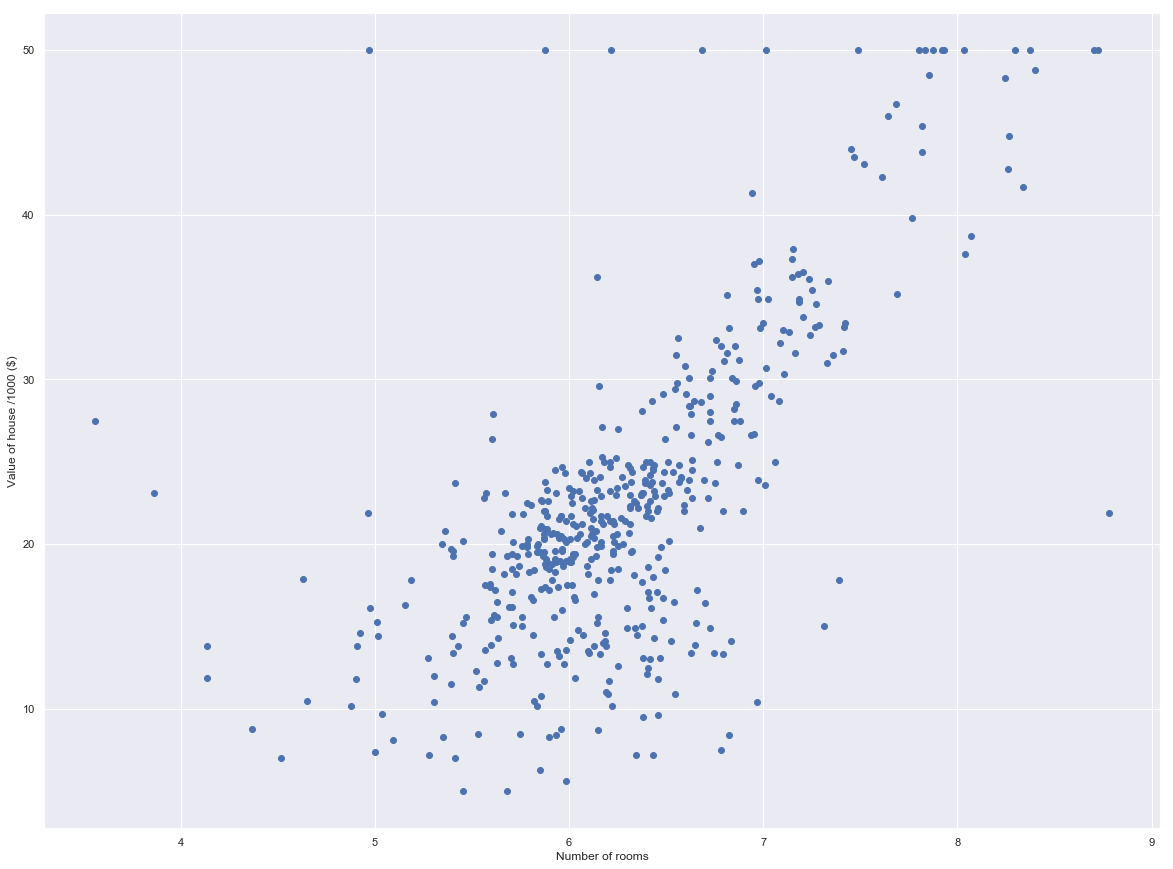

In [6]:
# Plotting house value vs. number of rooms
plt.figure(figsize=(20,15))
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

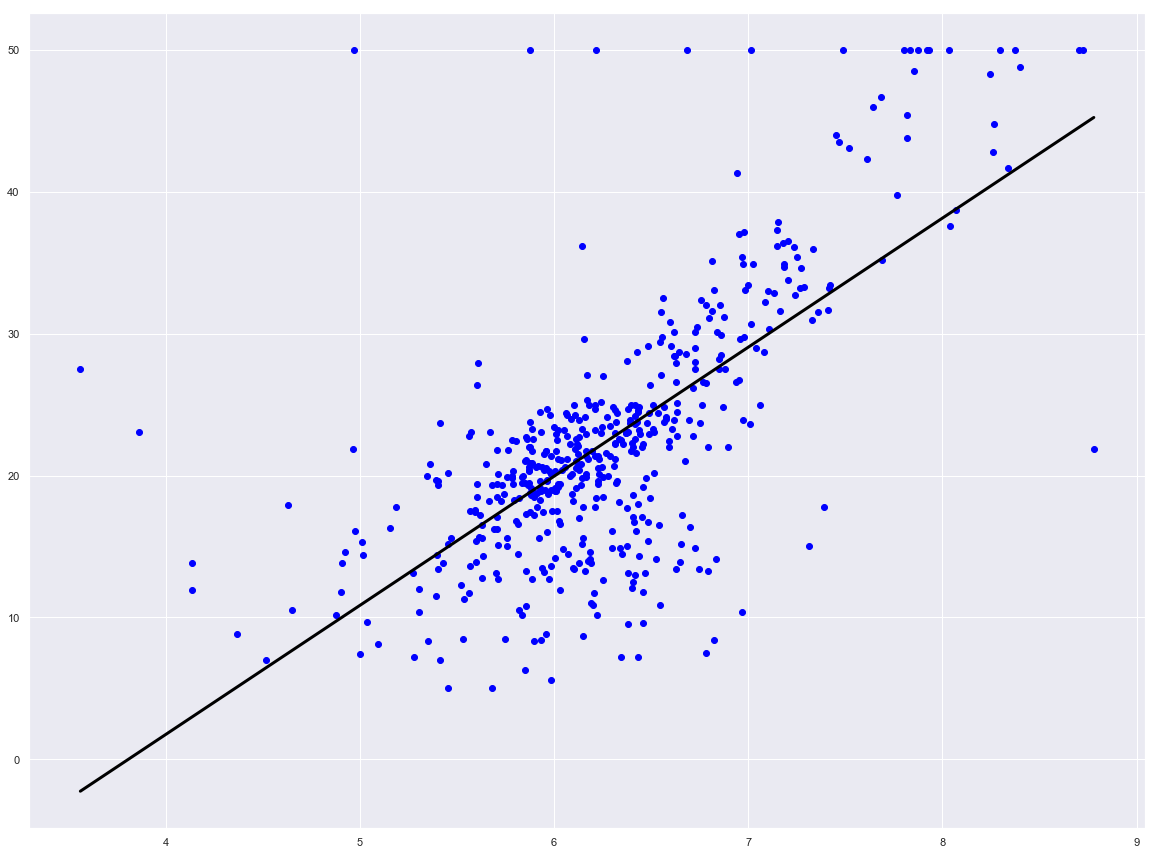

In [7]:
# Fitting a regression model
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

plt.figure(figsize=(20,15))
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)
plt.show()

### Which of the following is a regression problem?
Andy introduced regression to you using the Boston housing dataset. But regression models can be used in a variety of contexts to solve a variety of different problems.

Given below are four example applications of machine learning. Your job is to pick the one that is best framed as a regression problem.

**Answer the question**
- [ ] An e-commerce company using labeled customer data to predict whether or not a customer will purchase a particular item.
- [ ] A healthcare company using data about cancer tumors (such as their geometric measurements) to predict whether a new tumor is benign or malignant.
- [ ] A restaurant using review data to ascribe positive or negative sentiment to a given review.
- [x] A bike share company using time and weather data to predict the number of bikes being rented at any given hour.

The target variable here - **the number of bike rentals at any given hour** - is quantitative, so this is best framed as a regression problem.

### Importing data for supervised learning
In this chapter, you will work with [Gapminder][1] data that we have consolidated into one CSV file available in the workspace as `'gapminder.csv'`. Specifically, your goal will be to use this data to **predict the life expectancy in a given country** based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: `'fertility'`, which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's `.reshape()` method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

[1]: https://www.gapminder.org/data/

In [8]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('../_datasets/gm_2008_region.csv')
df = df.drop(['Region'], axis=1)
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [9]:
# Create arrays for features and target variable
y = df.life.values
X = df.fertility.values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


Notice the differences in shape before and after applying the `.reshape()` method. Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.

### Exploring the Gapminder data
As always, it is important to explore your data before building models. We have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as `df`. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

Then, explore the DataFrame using pandas methods such as `.info()`, `.describe()`, `.head()`.

In case you are curious, the heatmap was generated using Seaborn's heatmap function and the following line of code, where `df.corr()` computes the pairwise correlation between columns:
```Python
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
```
Once you have a feel for the data, consider the statements below and select the one that is **not** true. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
dtypes: float64(9)
memory usage: 9.9 KB


In [11]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


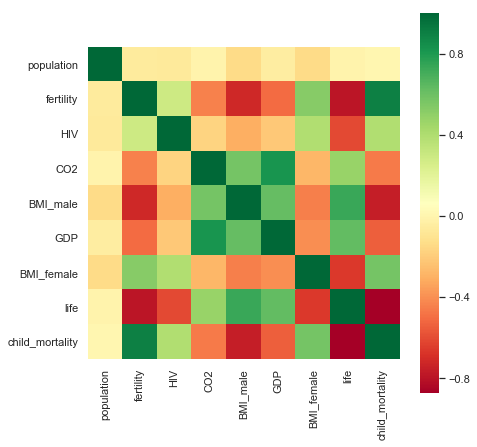

In [12]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

**Possible Answers**
- [ ] The DataFrame has 139 samples (or rows) and 9 columns.
- [ ] life and fertility are negatively correlated.
- [ ] The mean of life is 69.602878.
- [x] fertility is of type int64.
- [ ] GDP and life are positively correlated.

## The basics of linear regression

Regression mechanics
- $y = ax + b$
    - $y = target$
    - $x = single feature$
    - $a, b = parameters of model$
- How do we choose a and b?
- Define an error function for any given line
    - Choose the line that minimizes the error function
    
### The loss function 
- Ordinary least squares (OLS): Minimize sum of squares of residuals
![][OLS]

### Linear regression in higher dimensions
$y = a_1x_1 + a_2x_2 + b$
- To fit a linear regression model here:
    - Need to specify 3 variables
- In higher dimensions:
    > $y = a_1x_1 + a_2x_2 + a_3x_3 + ... + a_nx_n + b$   
    
    - Must specify coefficient for each feature and the variable b
- Scikit-learn API works exactly the same way:
    - Pass two arrays: Features, and target

[OLS]: _Docs/OLS.GIF

In [13]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/02-The_basics_of_linear_regression.mp4" type="video/mp4">
</video>

### Fit & predict for regression
Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the `'RM'` feature of the Boston housing dataset. In this exercise, you will use the `'fertility'` feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is `'life'`. The array for the target variable has been pre-loaded as `y` and the array for `'fertility'` has been pre-loaded as `X_fertility`.

A scatter plot with `'fertility'` on the x-axis and `'life'` on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the $R^2$ score using sckit-learn's `.score()` method.

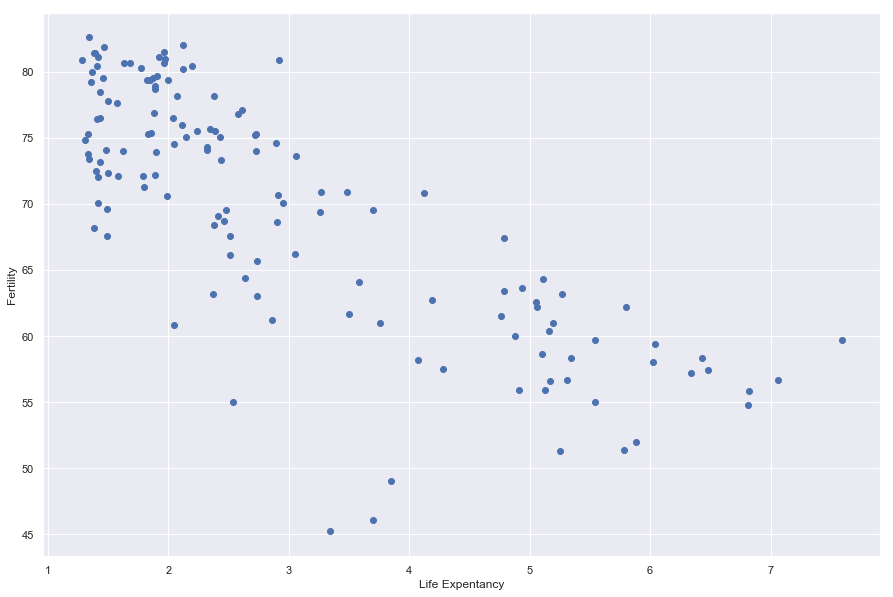

In [14]:
y = df.life.values
X_fertility = df.fertility.values


plt.figure(figsize=(15,10))
plt.scatter(X_fertility, y)
plt.ylabel('Fertility')
plt.xlabel('Life Expentancy')
plt.show()

In [15]:
# Reshape X and y
y = y.reshape(-1,1)
X_fertility = X_fertility.reshape(-1,1)

R^2:  0.6192442167740035


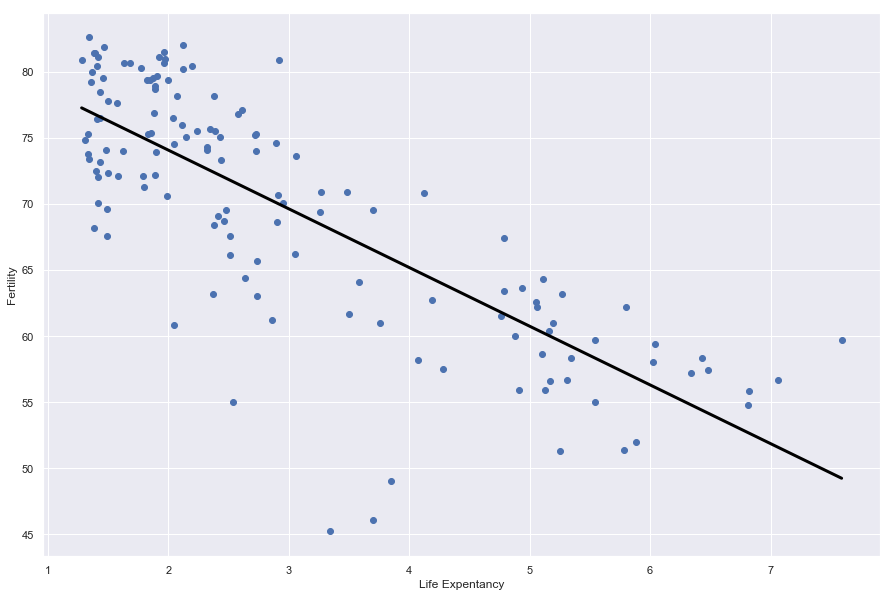

In [16]:
# Create the regressor: reg
reg = linear_model.LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print('R^2: ',reg.score(X_fertility, y))

# Plot regression line
plt.figure(figsize=(15,10))
plt.scatter(X_fertility, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.ylabel('Fertility')
plt.xlabel('Life Expentancy')
plt.show()

Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!

## Train/test split for regression
As you learned in Chapter 1, **train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data**. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the $R^2$ score, you will also compute the **Root Mean Squared Error (RMSE)**, which is another commonly used metric to evaluate regression models. The feature array `X` and target variable array `y` have been pre-loaded for you from the DataFrame `df`.

In [17]:
# Using all features
X = df.drop(['life'], axis=1).values

y = df.life.values

In [18]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = linear_model.LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430135
Root Mean Squared Error: 3.2476010800369455


Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. Can you spot it? 

**The R squared returned is dependent on the way the data was splitted**

## Cross-validation
It's a method to avoid the problem of metric of choice like R square being dependant of the test split.

### Cross-validation motivation
- Model performance is dependent on way the data is split
- Not representative of the model’s ability to generalize
- Solution: Cross-validation!

![][CV]

### Cross-validation and model performance
- 5 folds = 5-fold CV
- 10 folds = 10-fold CV
- k folds = k-fold CV
- More folds = **More computationally expensive**

[CV]: _Docs/CV.gif

In [19]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/03-Cross-validation.mp4" type="video/mp4">
</video>

### 5-fold cross-validation
Cross-validation is a vital step in evaluating a model. **It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.**

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's `cross_val_score()` function uses $R^2$ as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

The DataFrame has been loaded as `df` and split into the feature/target variable arrays `X` and `y`. The modules pandas and numpy have been imported as `pd` and `np`, respectively.

In [20]:
# Using all features
X = df.drop(['life'], axis=1).values

y = df.life.values

In [21]:
# Create a linear regression object: reg
reg = linear_model.LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793505


Now that you have cross-validated your model, you can more confidently evaluate its predictions.

### K-Fold CV comparison
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use `%timeit` to see how long each 3-fold CV takes compared to 10-fold CV by executing the following `cv=3` and `cv=10`:
```Python
%timeit cross_val_score(reg, X, y, cv = ____)
```
pandas and numpy are available in the workspace as `pd` and `np`. The DataFrame has been loaded as `df` and the feature/target variable arrays `X` and `y` have been created.

In [22]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))

0.8718712782622265
0.8436128620131369


In [23]:
%timeit cross_val_score(reg,X,y,cv=3)

2.72 ms ± 93.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
%timeit cross_val_score(reg,X,y,cv=10)

8.97 ms ± 256 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Regularized regression

### Why regularize?
- Recall: Linear regression minimizes a loss function
- It chooses a coefficient for each feature variable
- Large coefficients can lead to overfitting
- Penalizing large coefficients: Regularization

### Ridge regression
- Loss function = OLS loss function + $\alpha * \sum_{i=1}^n a_i^2  $
- **Alpha**: Parameter we need to choose
- Picking alpha here is similar to picking k in k-NN
- Hyperparameter tuning (More in Chapter 3)
- Alpha controls model complexity
    - $Alpha = 0$: We get back OLS (Can lead to overfitting)
    - **Very high alpha**: Can lead to underfitting

### Lasso regression
- Loss function = OLS loss function + $\alpha * \sum_{i=1}^n |a_i| $

### Lasso regression for feature selection
- Can be used to select important features of a dataset
- Shrinks the coefficients of less important features to exactly 0
- The features whose coefficients are not shrunk to 0 are "selected" by the LASSO algorithm


In [25]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/04-Regularized_regression.mp4" type="video/mp4">
</video>

In [26]:
### Example of LASSO for feature selection in sickit-learn

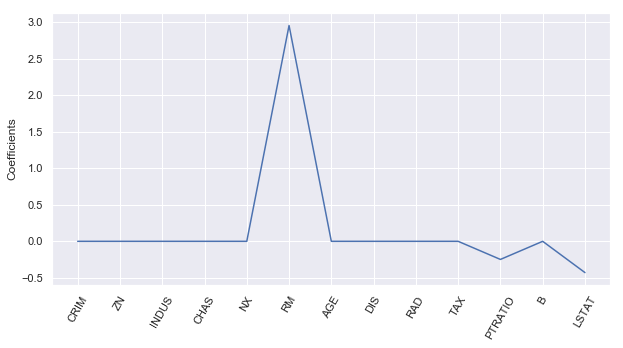

In [27]:
# Creating feature and target arrays
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

# Getting the features names
names = boston.drop('MEDV', axis=1).columns

# Instantiate a Lasso Regresor
lasso = linear_model.Lasso(alpha=0.1, normalize=True)

# Selecting features coefficients 
lasso_coef = lasso.fit(X,y).coef_

# Plotting the coefficients as a function of features names
plt.figure(figsize=(10,5))
_ = plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel("Coefficients")
plt.show()

**It's clear that the most important predictor (feature) for our target variable, housing price, is number of rooms!** 

### Regularization I: Lasso
In the video, you saw how Lasso selected out the `'RM'` feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. **Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features**.

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

The feature and target variable arrays have been pre-loaded as `X` and `y`.

In [28]:
# Using all predictors (features) of Gapminder Dataset
X = df.drop(['life'], axis=1).values

# Target variable
y = df.life.values

# Getting the features names
df_columns = df.drop('life', axis=1).columns

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


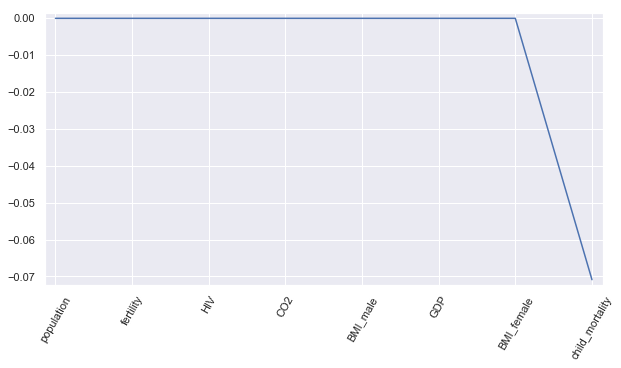

In [29]:
# Instantiate a lasso regressor: lasso
lasso = linear_model.Lasso(alpha = 0.4, normalize = True) 

# Fit the regressor to the data
lasso = lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.figure(figsize=(10,5))
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

According to the lasso algorithm, it seems like `'child_mortality'` is the most important feature when predicting `life expectancy`.

### Regularization II: Ridge
**Lasso is great for feature selection**, but **when building regression models, Ridge regression should be your first choice**.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as $L1$ regularization because the regularization term is the $L1$ norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the $L2$ norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated $R^2$ scores for each, using this function that we have defined for you, which plots the $R^2$ score as well as standard error for each alpha:
```Python
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
```    
The motivation behind this exercise is for you to see how the $R^2$ score varies with different alphas, and to understand the importance of selecting the right value for alpha. 

In [30]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

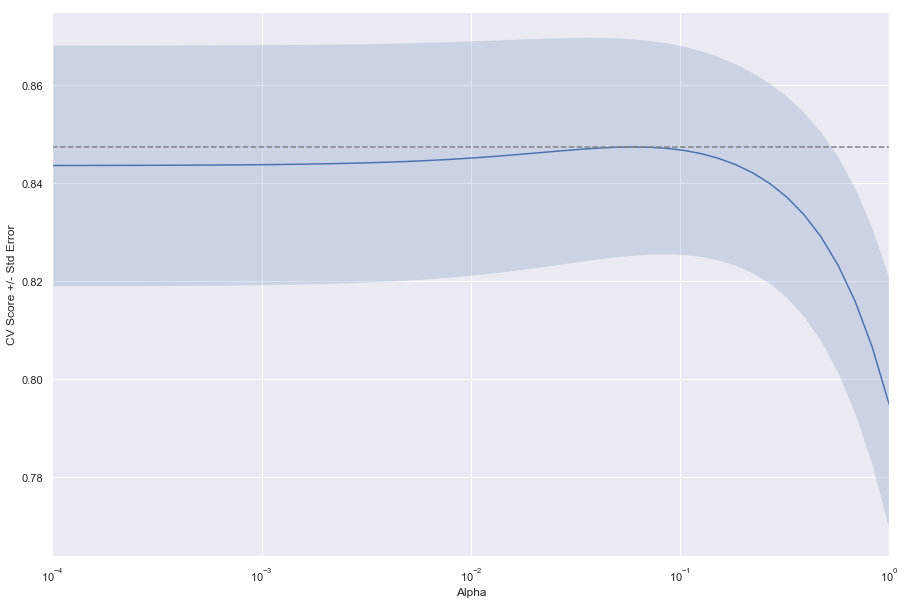

In [31]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = linear_model.Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Notice how the cross-validation scores change with different alphas. **Which alpha should you pick?**